In [1]:
from model import ModelHandler
from DataLoader import SegmentationDataset, DiagnosisEnd2End
from torch.utils.data import Dataset, DataLoader
import os
import numpy as np

## End2End Data

In [2]:
path_segmentation = "../data/Diagnosis/"
nodules_path = "../data/Diagnosis/Radiolung_NoduleDiagnosis.csv"

In [3]:
diagonis = DiagnosisEnd2End(path_segmentation, nodules_path)

X_data_curated = np.zeros((47,14, 240, 240))
y_data_curated = np.zeros(47)
i = 0

for data in diagonis:
    m = data['ROI'].shape[0]//2
    X_data_curated[i] = data['ROI'][m-7:m+7,:,:]
    y_data_curated[i] = data['GT']
    i+=1


## SVM

In [4]:
svm = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'SVM', n_splits = 5)
svm.fit(True,True)

[INFO] The best parameters are {'C': 0.01, 'kernel': 'linear'}
[INFO] The best score is 0.8800
[INFO] The best parameters according to ci are {'C': 0.01, 'kernel': 'linear'}
[INFO] Train acc  is : 1.0000


In [5]:
svm.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,C,kernel,mean,sem,ci,sort
0,"{'C': 0.01, 'kernel': 'linear'}",0.9,1.0,0.9,0.8,0.8,1.000000e-02,linear,0.88,0.037417,"(0.7761149088671919, 0.9838850911328079)",0.388057
12,"{'C': 10000000.0, 'kernel': 'linear'}",0.9,1.0,0.9,0.8,0.8,1.000000e+07,linear,0.88,0.037417,"(0.7761149088671919, 0.9838850911328079)",0.388057
4,"{'C': 10.0, 'kernel': 'linear'}",0.9,1.0,0.9,0.8,0.8,1.000000e+01,linear,0.88,0.037417,"(0.7761149088671919, 0.9838850911328079)",0.388057
16,"{'C': 10000000000.0, 'kernel': 'linear'}",0.9,1.0,0.9,0.8,0.8,1.000000e+10,linear,0.88,0.037417,"(0.7761149088671919, 0.9838850911328079)",0.388057
8,"{'C': 10000.0, 'kernel': 'linear'}",0.9,1.0,0.9,0.8,0.8,1.000000e+04,linear,0.88,0.037417,"(0.7761149088671919, 0.9838850911328079)",0.388057


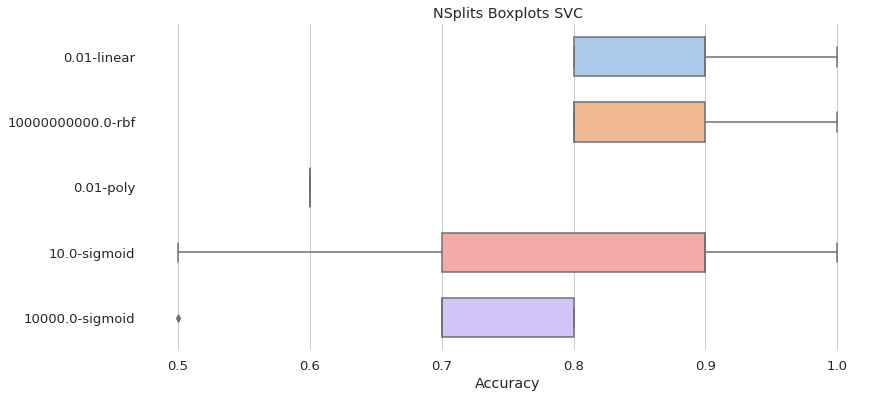

In [7]:
svm.boxplots(20)

## KNN

In [8]:
knn = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'KNN', n_splits = 5)
knn.fit(True,True)

[INFO] The best parameters are {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
[INFO] The best score is 0.8400
[INFO] The best parameters according to ci are {'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}
[INFO] Train acc  is : 0.8298


In [9]:
knn.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,algorithm,n_neighbors,p,mean,sem,ci,sort
31,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}",0.7,1.0,0.9,0.8,0.8,brute,9,2,0.84,0.05099,"(0.6984284945373216, 0.9815715054626786)",0.349214
13,"{'algorithm': 'ball_tree', 'n_neighbors': 7, '...",0.7,1.0,0.9,0.8,0.8,ball_tree,7,2,0.84,0.05099,"(0.6984284945373216, 0.9815715054626786)",0.349214
26,"{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1}",0.7,1.0,0.9,0.8,0.8,brute,5,1,0.84,0.05099,"(0.6984284945373216, 0.9815715054626786)",0.349214
25,"{'algorithm': 'brute', 'n_neighbors': 3, 'p': 2}",0.7,1.0,0.9,0.8,0.8,brute,3,2,0.84,0.05099,"(0.6984284945373216, 0.9815715054626786)",0.349214
29,"{'algorithm': 'brute', 'n_neighbors': 7, 'p': 2}",0.7,1.0,0.9,0.8,0.8,brute,7,2,0.84,0.05099,"(0.6984284945373216, 0.9815715054626786)",0.349214


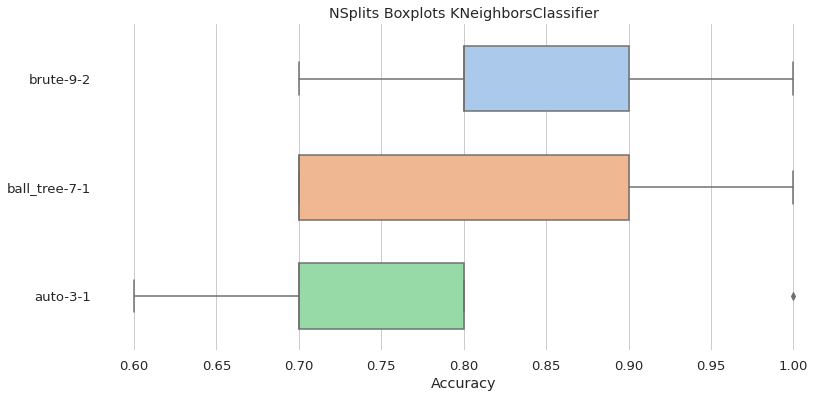

In [16]:
knn.boxplots(30)

## Decision Tree

In [11]:
dt = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'DT', n_splits = 5)
dt.fit(True,True)

[INFO] The best parameters are {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}
[INFO] The best score is 0.8200
[INFO] The best parameters according to ci are {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}
[INFO] Train acc  is : 1.0000


In [12]:
dt.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,criterion,max_features,splitter,mean,sem,ci,sort
3,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.8,0.9,0.8,0.7,0.8,gini,sqrt,random,0.80,0.031623,"(0.7122010689270405, 0.8877989310729596)",0.356101
9,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.8,1.0,0.8,0.8,0.7,entropy,sqrt,random,0.82,0.048990,"(0.6839824961038976, 0.9560175038961025)",0.341991
10,"{'criterion': 'entropy', 'max_features': 'log2...",0.8,1.0,0.7,0.8,0.8,entropy,log2,best,0.82,0.048990,"(0.6839824961038975, 0.9560175038961024)",0.341991
0,"{'criterion': 'gini', 'max_features': 'auto', ...",0.9,0.9,0.9,0.6,0.8,gini,auto,best,0.82,0.058310,"(0.6581067937646783, 0.9818932062353218)",0.329053
5,"{'criterion': 'gini', 'max_features': 'log2', ...",0.8,1.0,0.9,0.6,0.8,gini,log2,random,0.82,0.066333,"(0.6358314389363505, 1.0041685610636497)",0.317916


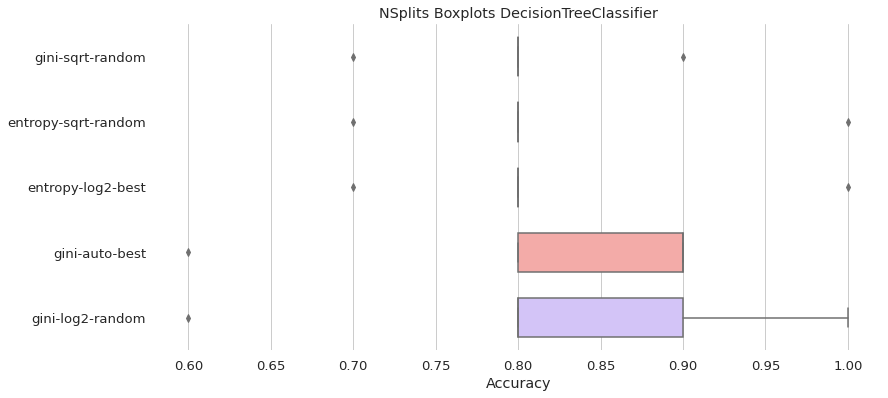

In [17]:
dt.boxplots(5)